In [1]:
import pickle
import easydict


In [2]:
fileRAPzs = '/mnt/rhome/paa/pedestrian/Rethinking_of_PAR/data/RAP2/dataset_zs_run0.pkl'

f = open(fileRAPzs, 'rb+')

dataset = pickle.load(f)


In [3]:
dataset.label[dataset.partition.train][0][0:53]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [4]:
dataset.label[dataset.partition.test]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [5]:

dataset.keys()
# check annotations.md and make each label

dict_keys(['description', 'reorder', 'root', 'image_name', 'label', 'attr_name', 'label_idx', 'partition', 'weight_train', 'weight_trainval'])

In [6]:
listAttributesRAPv2 = ['hs-BaldHead', 'hs-LongHair', 'hs-BlackHair', 'hs-Hat', 'hs-Glasses','ub-Shirt','ub-Sweater','ub-Vest','ub-TShirt','ub-Cotton','ub-Jacket','ub-SuitUp','ub-Tight','ub-ShortSleeve','ub-Others','lb-LongTrousers','lb-Skirt','lb-ShortSkirt','lb-Dress','lb-Jeans','lb-TightTrousers','shoes-Leather', 'shoes-Sports', 'shoes-Boots', 'shoes-Cloth', 'shoes-Casual', 'shoes-Other','attachment-Backpack','attachment-ShoulderBag','attachment-HandBag','attachment-Box','attachment-PlasticBag','attachment-PaperBag','attachment-HandTrunk','attachment-Other','AgeLess16', 'Age17-30', 'Age31-45', 'Age46-60','Female','BodyFat','BodyNormal','BodyThin','Customer','Employee','action-Calling','action-Talking','action-Gathering','action-Holding','action-Pushing','action-Pulling','action-CarryingByArm','action-CarryingByHand','action-Other']
listAttributesRAPzs = listAttributesRAPv2

In [7]:
listZSALLattributes = list(dataset['attr_name'])

In [8]:
len(listZSALLattributes)

119

In [9]:
listZSattributes = [attribute for attribute in listZSALLattributes if attribute in listAttributesRAPzs]
listZSattributesIDX = [listZSALLattributes.index(attribute) for attribute in listZSALLattributes if attribute in listAttributesRAPzs]

In [10]:
listZSattributesIDX

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

#### Index are ordered

In [11]:
# order like listAttributesRAPzs
dataset.label[dataset.partition.test]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [12]:
# order like listAttributesRAPzs
maxAttributes = len(listAttributesRAPzs)


In [13]:
dataset.label[dataset.partition.test][:,:maxAttributes]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [14]:
import numpy as np

In [15]:
unique_rows = np.unique(dataset.label[dataset.partition.test][:,:maxAttributes], axis=0)

In [16]:
values = []
for unique_row in unique_rows:
    val = np.equal(dataset.label[dataset.partition.test][:,:maxAttributes], unique_row).all(axis=1).sum()
    values.append(val)

In [17]:
len(dataset.label[dataset.partition.test][:,:maxAttributes])

4928

In [18]:
len(values)

3004

In [19]:
import numpy as np
import random
from matplotlib import pyplot as plt

In [20]:
bins = np.arange(0, 100, 5) # fixed bin size

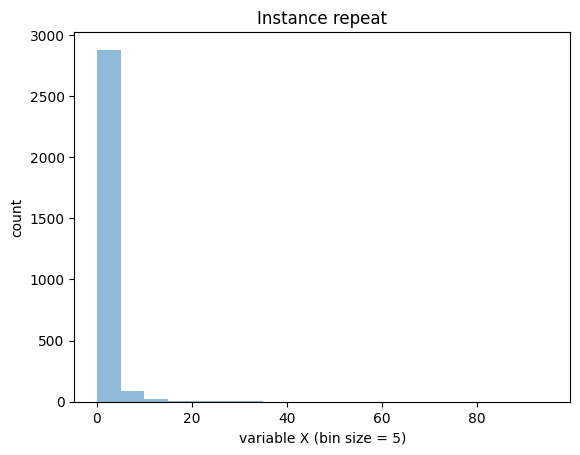

In [22]:
plt.hist(values, bins=bins, alpha=0.5)
plt.title('Instance repeat')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()

In [53]:
maxAttributes

53